In [1]:
import copy
import torch
from torch.utils.tensorboard import SummaryWriter

from data import artificial_1D_linear as data
from experiments.artificial_1D_linear.documentation import (
    evaluate,
    get_logging_dir,
    plot_data_split,
    plot_predictions,

)
from utils.federated_learning import average_models
from utils.self_learning_network import SelfLearningNet, combine

from experiments.artificial_1D_linear.my_fed_util import train_client, register_client_test_losses

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
x = SelfLearningNet([4, 4], 1, 1)
aaa = torch.rand((1024, 1))
print("1 \n", list(x.parameters()))
y1 = x(aaa)
for layer in range(x.num_layers):
    g = 0

    for param in x.layers[layer].parameters():
        g+=1

    print("SOFASDFASDF", g)
x.layers[2].weight.requires_grad = False
print("2 \n", list(x.parameters()))

x.normalize_layer(0)
print("3 \n", list(x.parameters()))

y2 = x(aaa)

print(torch.allclose(y1, y2))

1 
 [Parameter containing:
tensor([1.], requires_grad=True), Parameter containing:
tensor([[-0.2159, -0.4133],
        [ 0.2872,  0.5598],
        [-0.3873,  0.3646],
        [-0.6299,  0.3280]], requires_grad=True), Parameter containing:
tensor([[ 0.0932,  0.3387, -0.2910, -0.1518,  0.1983],
        [ 0.1608,  0.1493,  0.3593, -0.1927,  0.4352],
        [-0.4322, -0.1113,  0.0954, -0.2737, -0.1398],
        [ 0.2213,  0.0793,  0.0724,  0.1624,  0.0806]], requires_grad=True), Parameter containing:
tensor([[0.0370, 0.0952, 0.2114, 0.1230, 0.1518]], requires_grad=True)]
SOFASDFASDF 1
SOFASDFASDF 1
SOFASDFASDF 1
2 
 [Parameter containing:
tensor([1.], requires_grad=True), Parameter containing:
tensor([[-0.2159, -0.4133],
        [ 0.2872,  0.5598],
        [-0.3873,  0.3646],
        [-0.6299,  0.3280]], requires_grad=True), Parameter containing:
tensor([[ 0.0932,  0.3387, -0.2910, -0.1518,  0.1983],
        [ 0.1608,  0.1493,  0.3593, -0.1927,  0.4352],
        [-0.4322, -0.1113,  0.0954

In [4]:
NUM_CLIENTS = 2

COMMUNICATION_ROUNDS = 10
CLIENT_EPOCHS = 100

SPLIT_TYPE = "random"

In [5]:
CLIENT_IDs = range(NUM_CLIENTS)

BATCH_SIZE = 64

INPUT_FEATURES = 1
OUTPUT_FEATURES = 1
ARCHITECTURE = [11, 12, 11, 12]

LOSS_FN = torch.nn.MSELoss()

In [6]:
def register_hyperparameters(writer, last_loss):
    writer.add_hparams(
        {
            "client_epochs": CLIENT_EPOCHS,
            "num_clients": NUM_CLIENTS,
            "communication_rounds": COMMUNICATION_ROUNDS,
            "split_type": SPLIT_TYPE,
            "architecture": str(ARCHITECTURE),
        },
        {
            "MSE Test": last_loss,
        },
        run_name=".",
    )

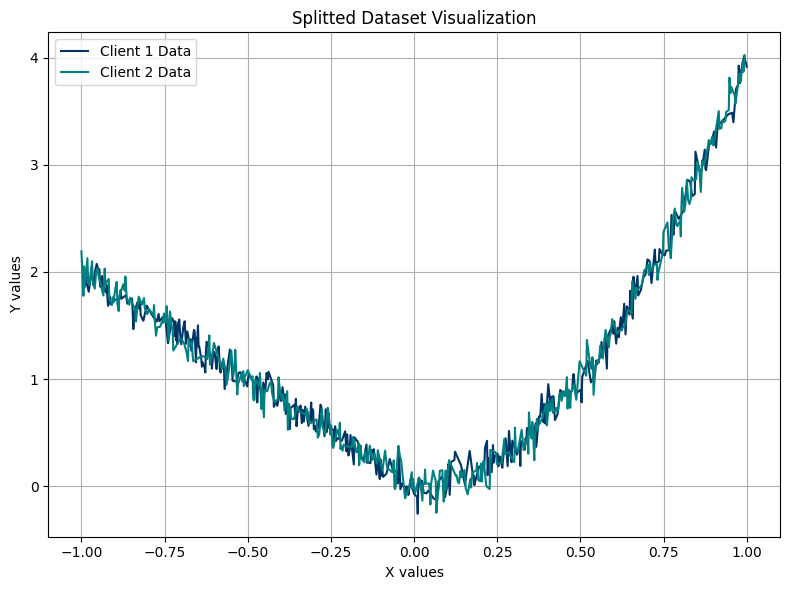

In [7]:
model_name = f"MyFed_{NUM_CLIENTS}clients_{SPLIT_TYPE}-split"
writer = SummaryWriter(get_logging_dir(model_name))

clients = [
    SelfLearningNet(ARCHITECTURE, INPUT_FEATURES, OUTPUT_FEATURES) for _ in CLIENT_IDs
]

client_train_dataloaders = data.get_client_test_dataloaders(
    NUM_CLIENTS, SPLIT_TYPE, BATCH_SIZE, shuffle=True
)

plot_data_split(client_train_dataloaders, writer)

In [8]:
print(clients[0])

SelfLearningNet(
  (activation): ReLU()
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=11, bias=False)
    (1): Linear(in_features=12, out_features=12, bias=False)
    (2): Linear(in_features=13, out_features=11, bias=False)
    (3): Linear(in_features=12, out_features=12, bias=False)
    (4): Linear(in_features=13, out_features=1, bias=False)
  )
)


Communication Round 0/10
 global model:  ModuleList(
  (0): Linear(in_features=2, out_features=15, bias=False)
  (1): Linear(in_features=16, out_features=24, bias=False)
  (2): Linear(in_features=25, out_features=22, bias=False)
  (3): Linear(in_features=23, out_features=24, bias=False)
  (4): Linear(in_features=25, out_features=2, bias=False)
  (5): Linear(in_features=3, out_features=1, bias=False)
)Communication Round 1/10
 global model:  ModuleList(
  (0): Linear(in_features=2, out_features=15, bias=False)
  (1): Linear(in_features=16, out_features=24, bias=False)
  (2): Linear(in_features=25, out_features=22, bias=False)
  (3): Linear(in_features=23, out_features=24, bias=False)
  (4): Linear(in_features=25, out_features=2, bias=False)
  (5): Linear(in_features=3, out_features=1, bias=False)
  (6): Linear(in_features=2, out_features=1, bias=False)
)Communication Round 2/10
 global model:  ModuleList(
  (0): Linear(in_features=2, out_features=15, bias=False)
  (1): Linear(in_feature

/Users/philipp/Documents/Studium/Informatik/Semester 2/Federated Learning/Project/experiments/artificial_1D_linear/documentation.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 5))


Communication Round 7/10
 global model:  ModuleList(
  (0): Linear(in_features=2, out_features=15, bias=False)
  (1): Linear(in_features=16, out_features=24, bias=False)
  (2): Linear(in_features=25, out_features=22, bias=False)
  (3): Linear(in_features=23, out_features=24, bias=False)
  (4): Linear(in_features=25, out_features=2, bias=False)
  (5): Linear(in_features=3, out_features=1, bias=False)
  (6-12): 7 x Linear(in_features=2, out_features=1, bias=False)
)Communication Round 8/10
 global model:  ModuleList(
  (0): Linear(in_features=2, out_features=15, bias=False)
  (1): Linear(in_features=16, out_features=24, bias=False)
  (2): Linear(in_features=25, out_features=22, bias=False)
  (3): Linear(in_features=23, out_features=24, bias=False)
  (4): Linear(in_features=25, out_features=2, bias=False)
  (5): Linear(in_features=3, out_features=1, bias=False)
  (6-13): 8 x Linear(in_features=2, out_features=1, bias=False)
)Communication Round 9/10
 global model:  ModuleList(
  (0): Line

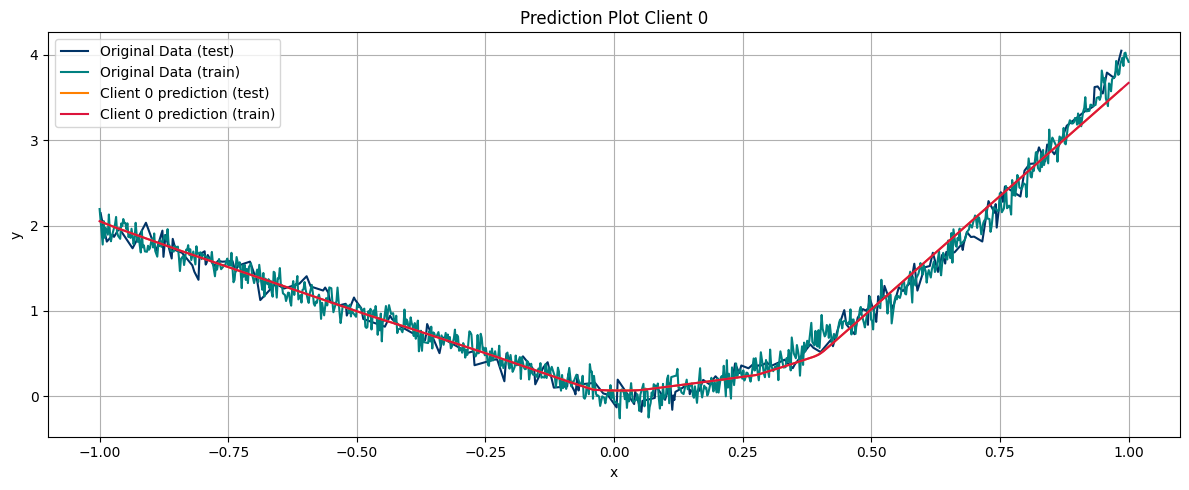

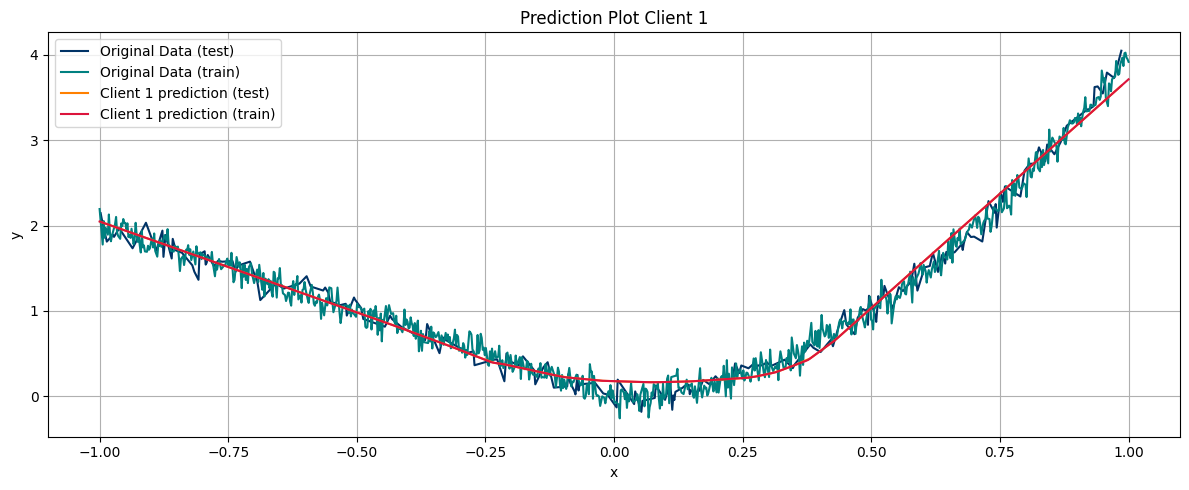

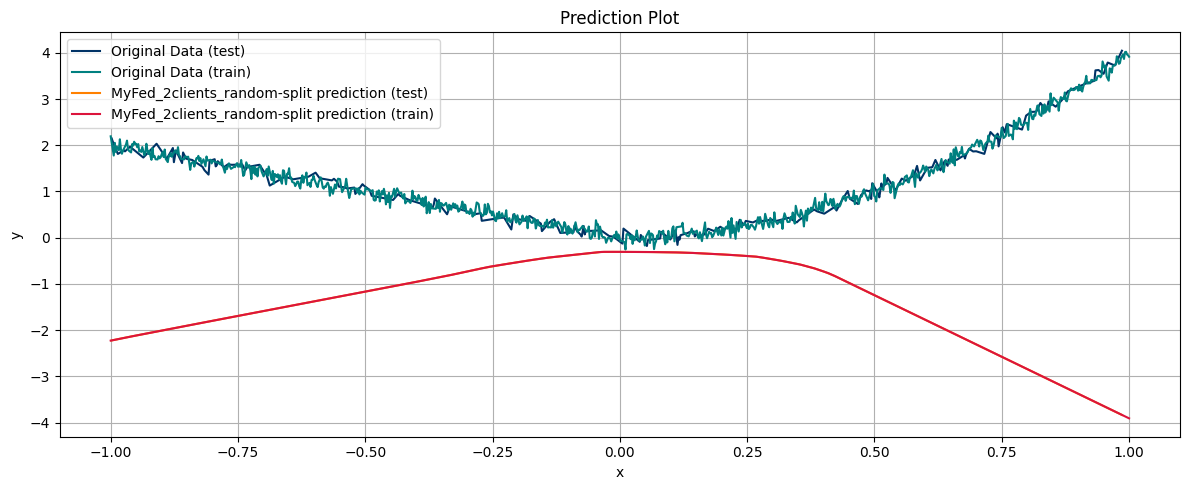

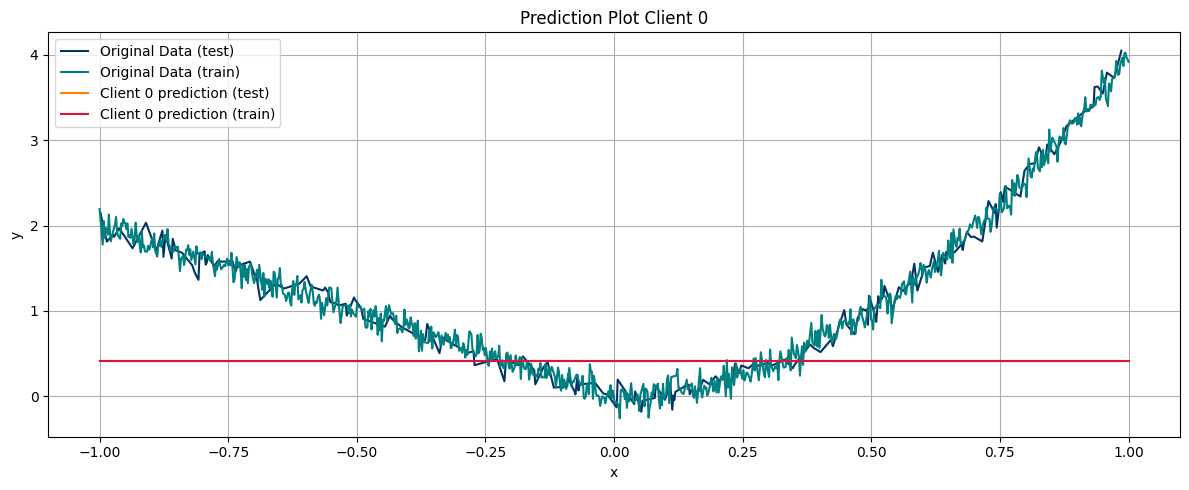

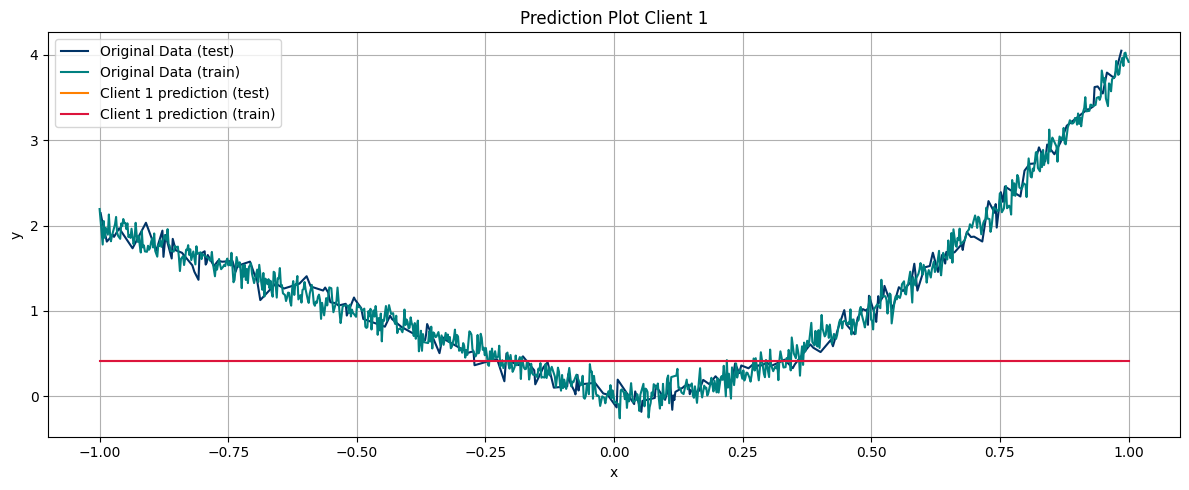

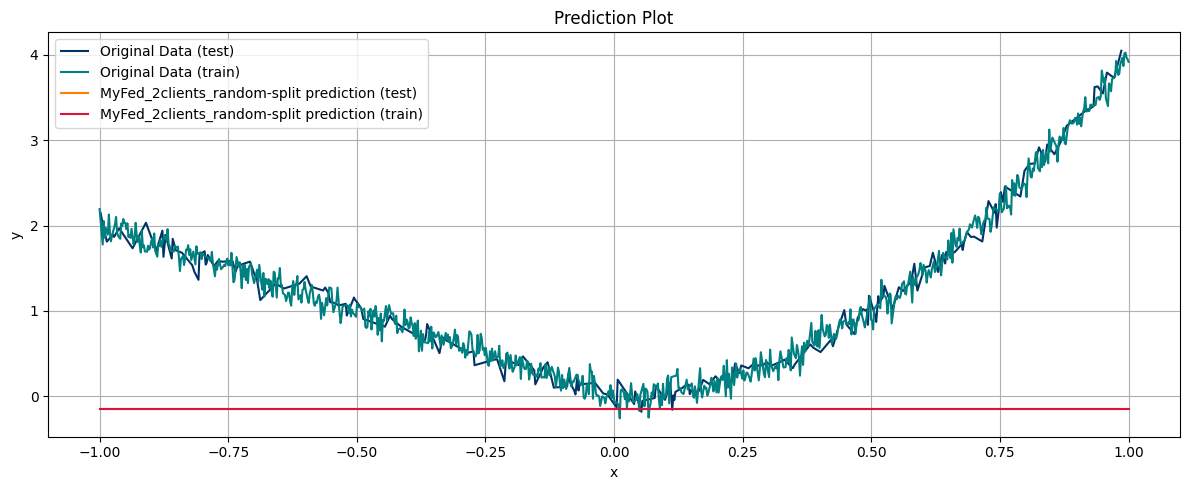

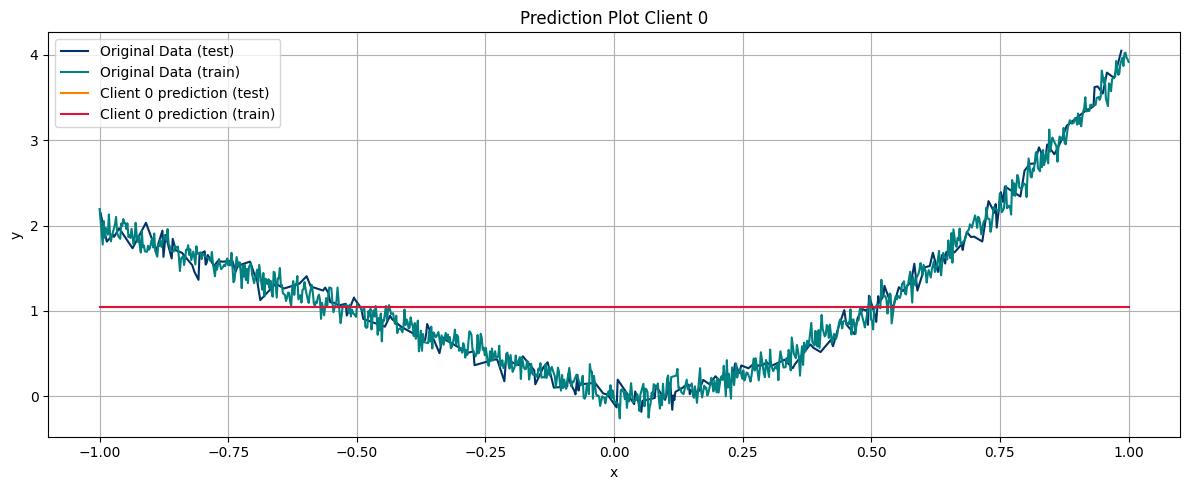

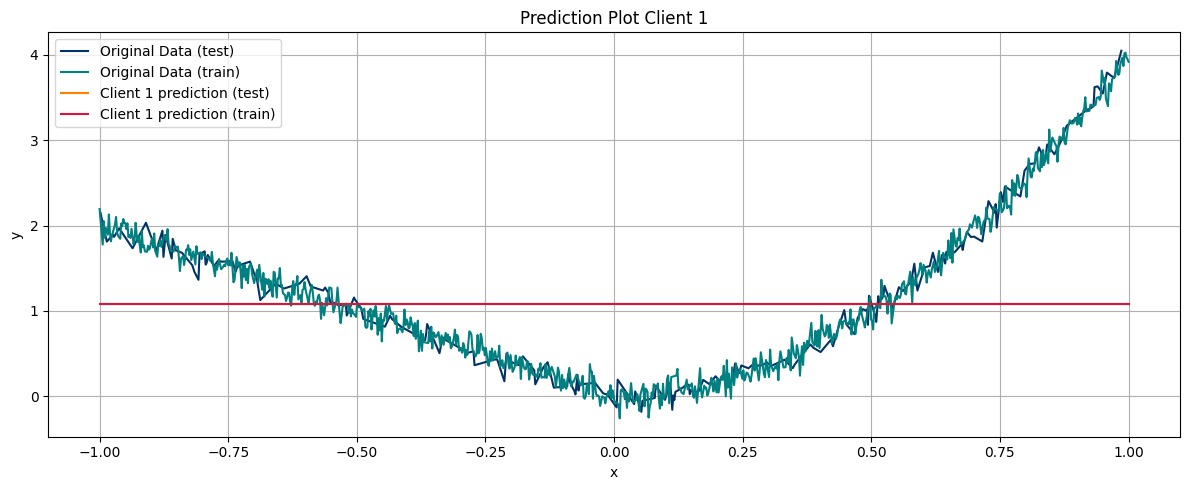

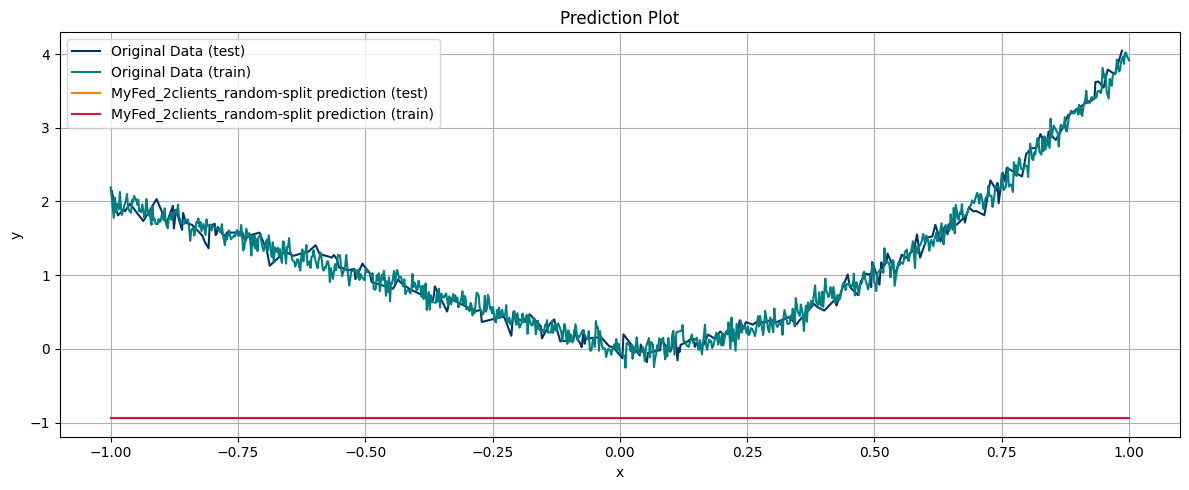

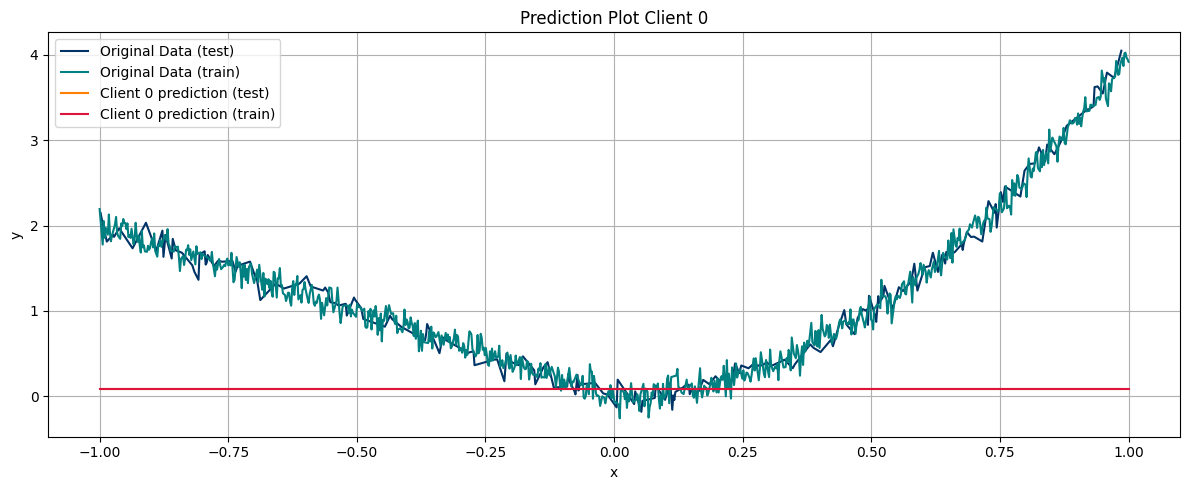

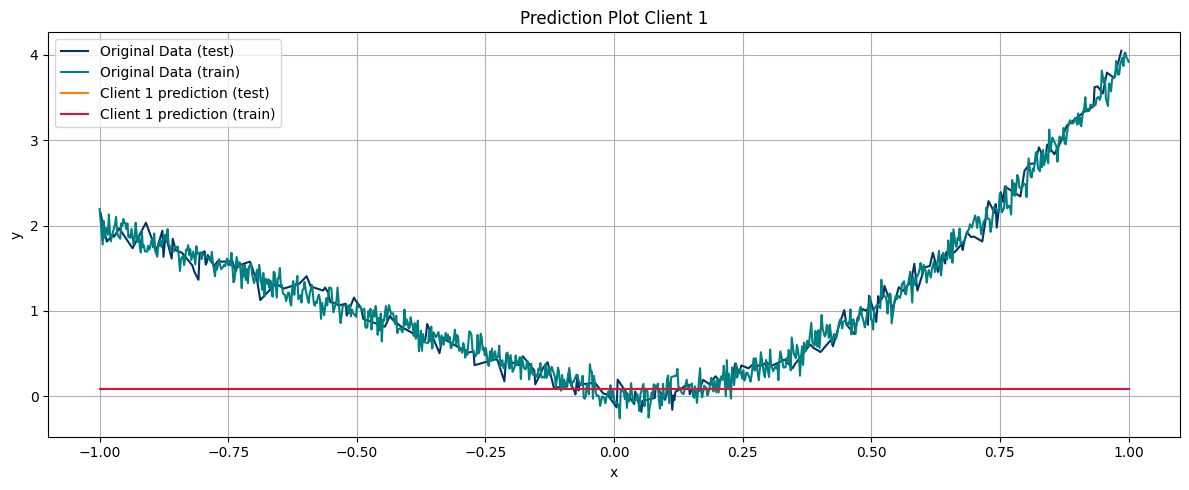

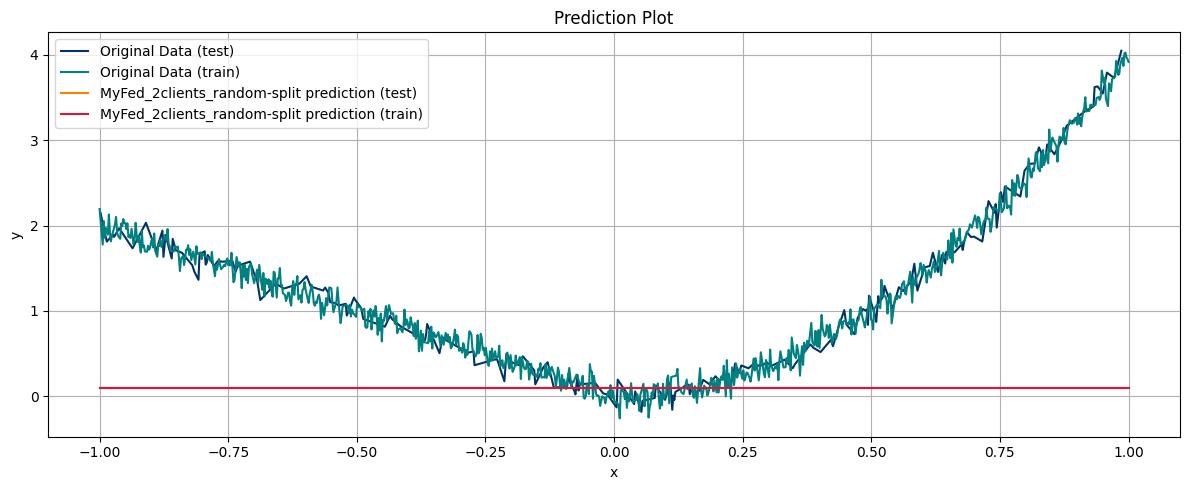

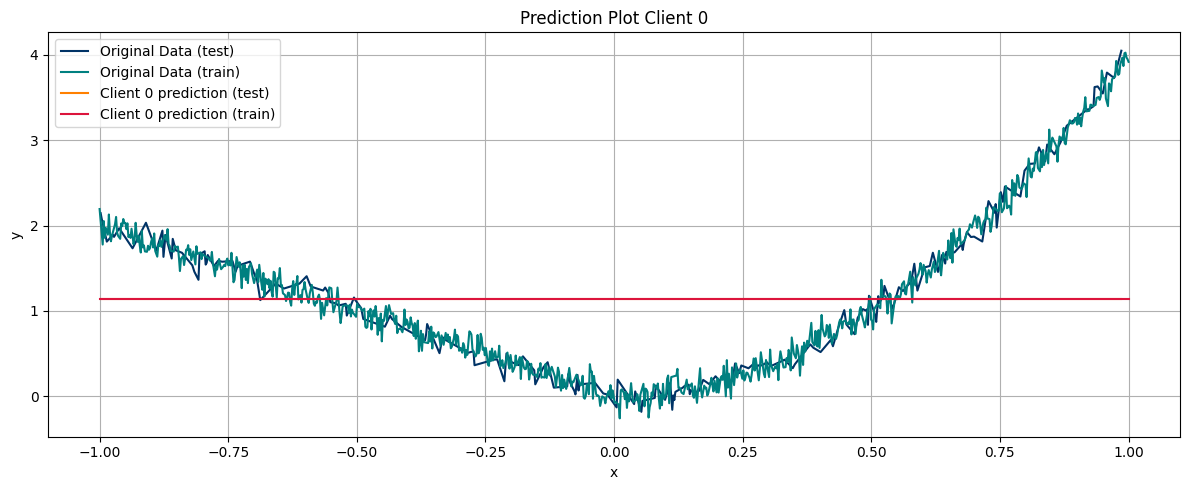

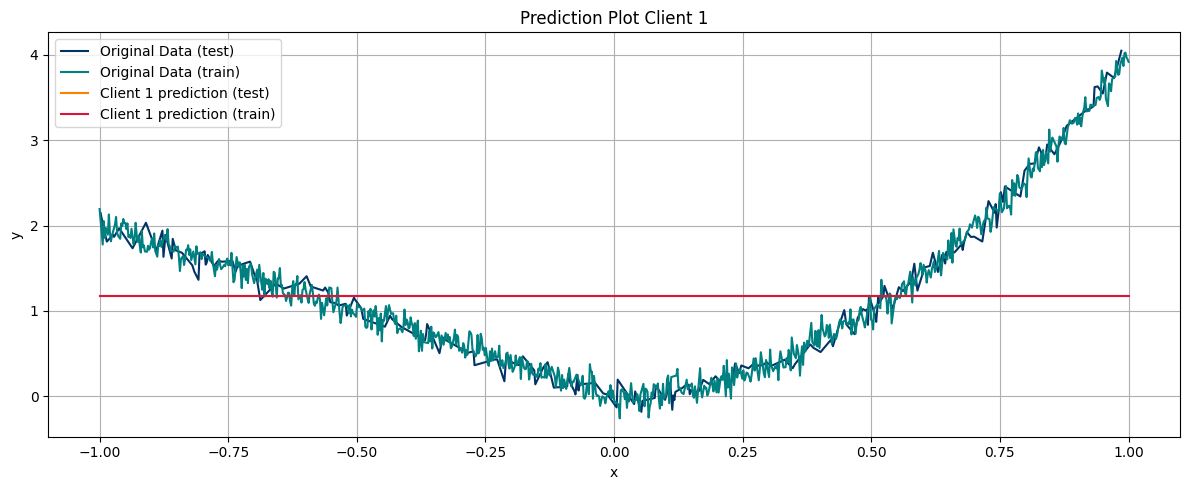

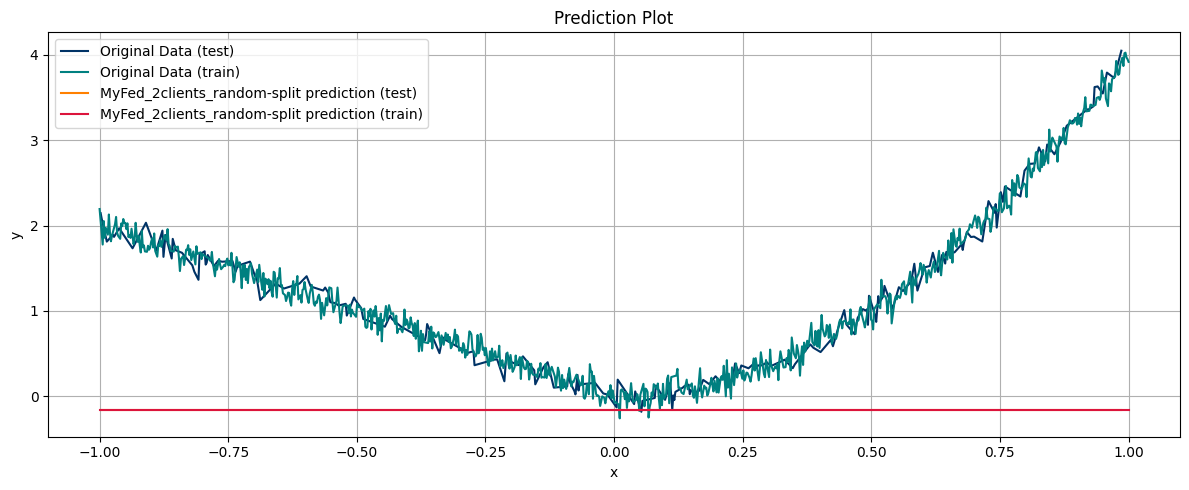

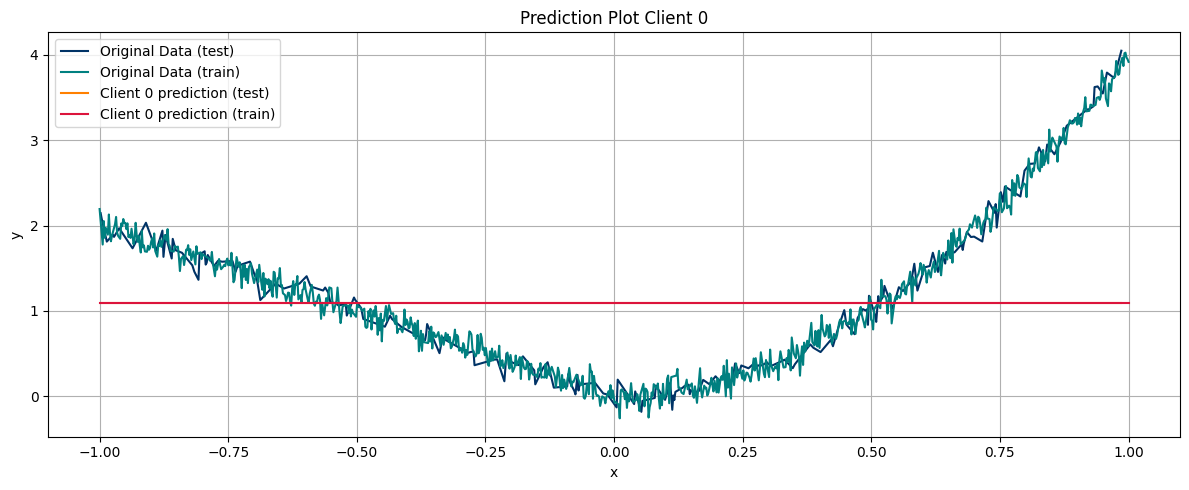

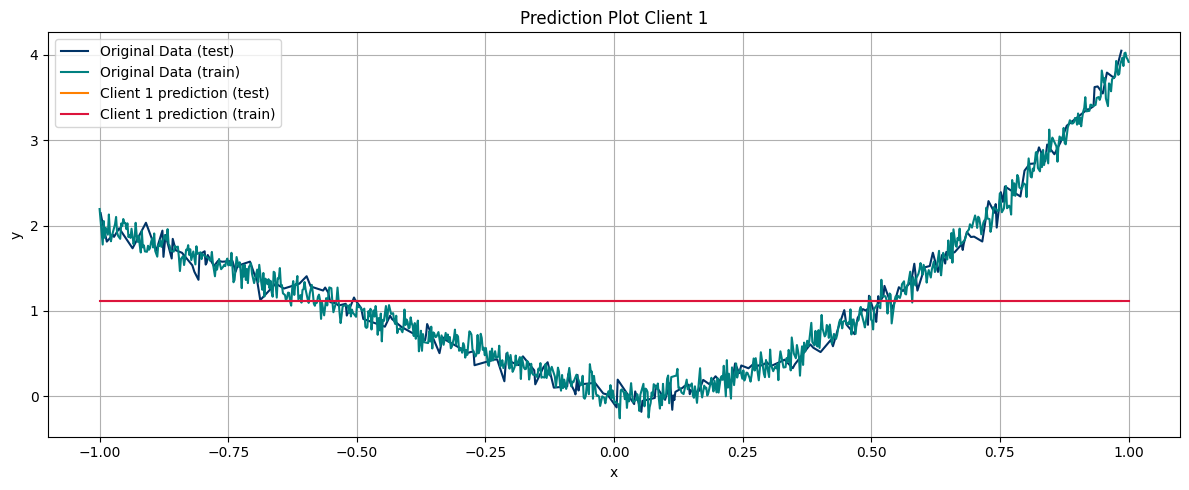

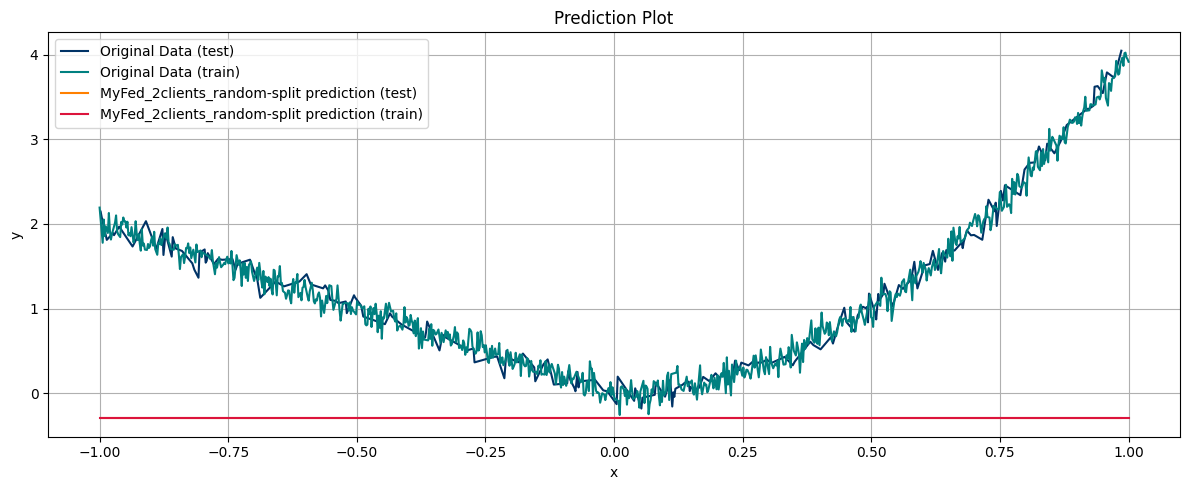

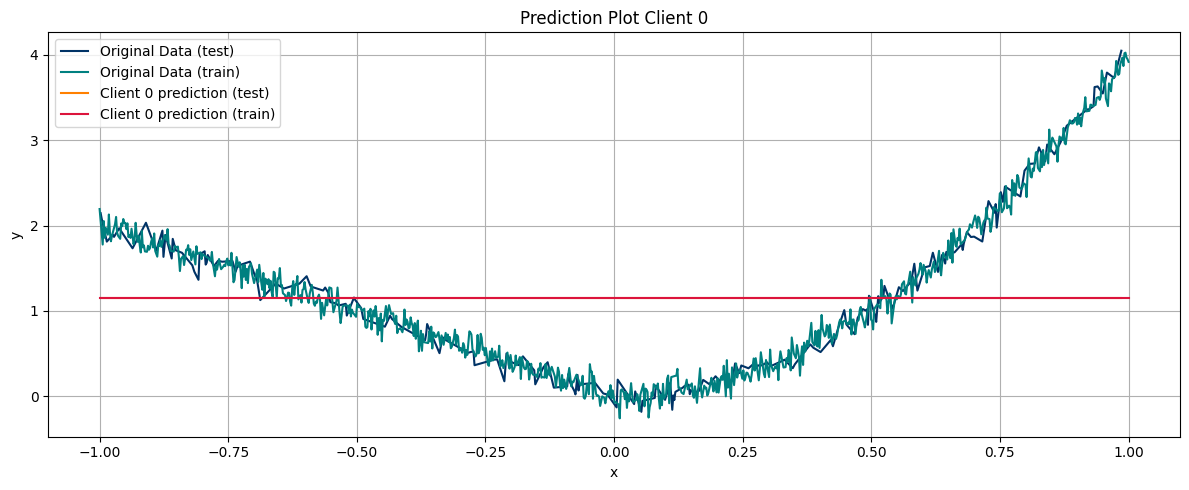

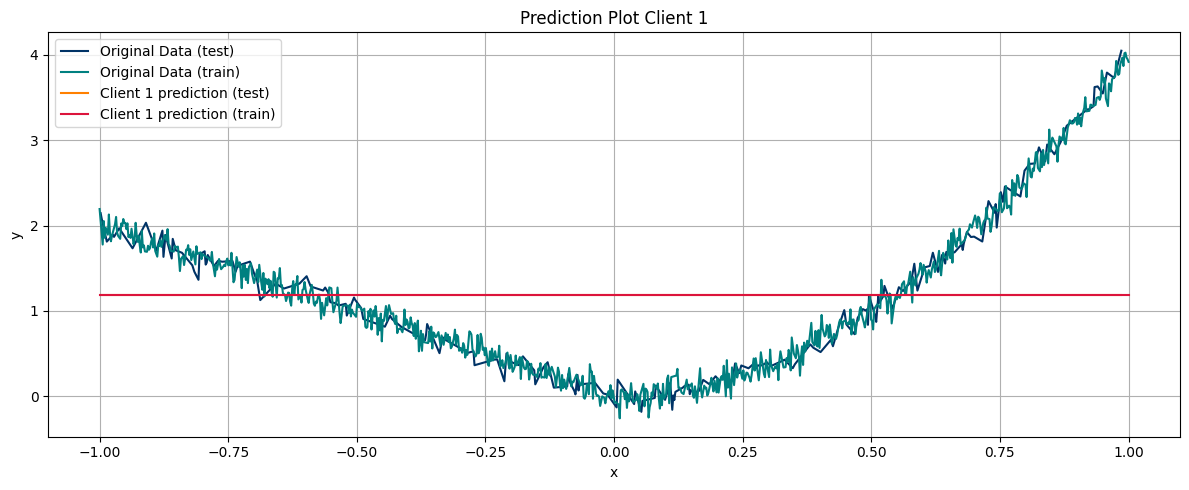

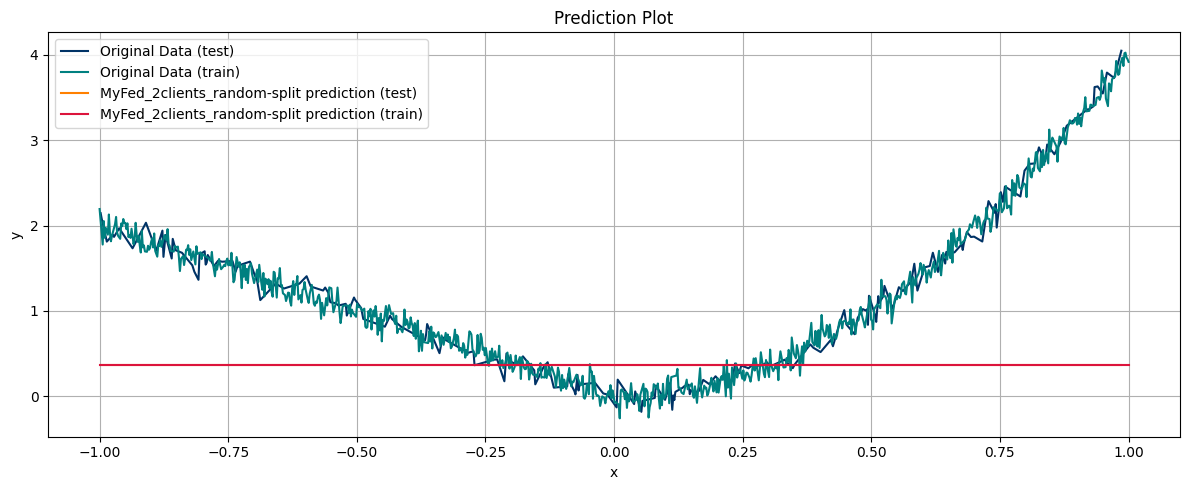

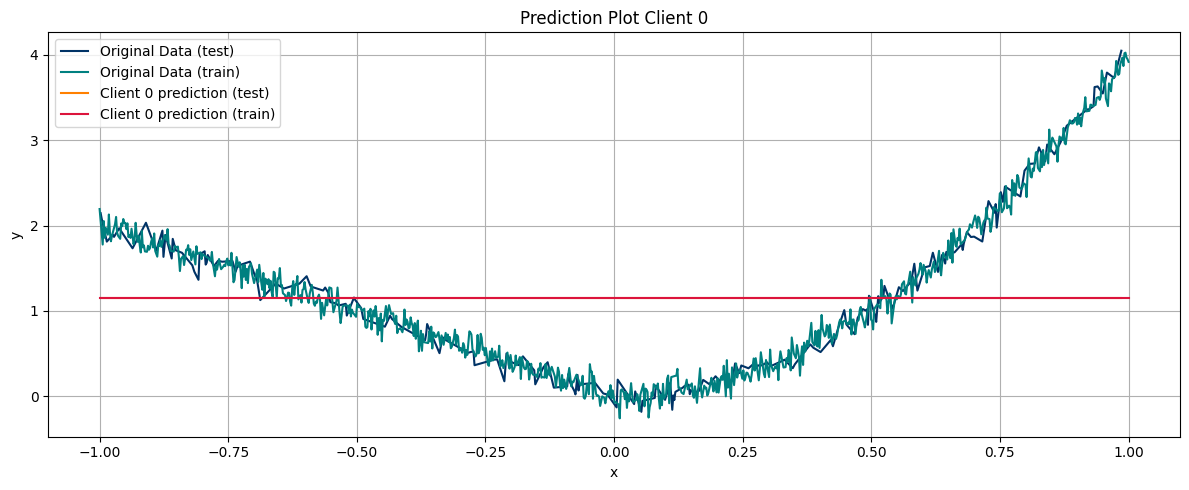

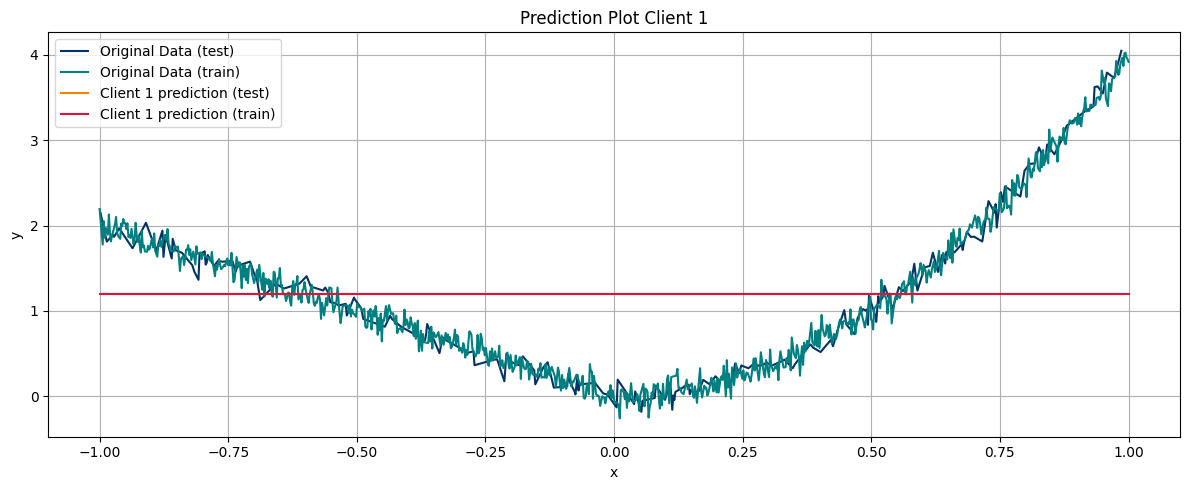

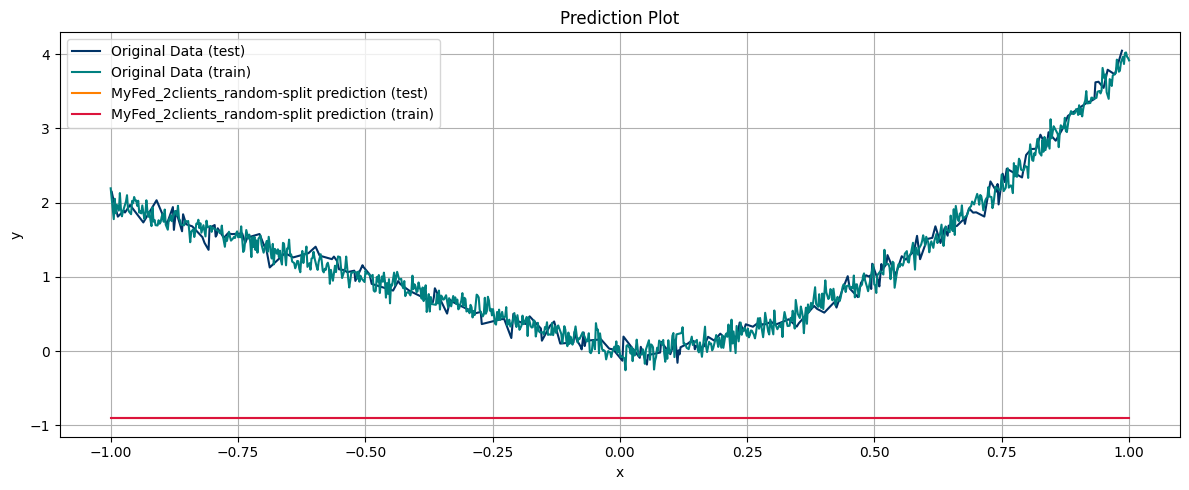

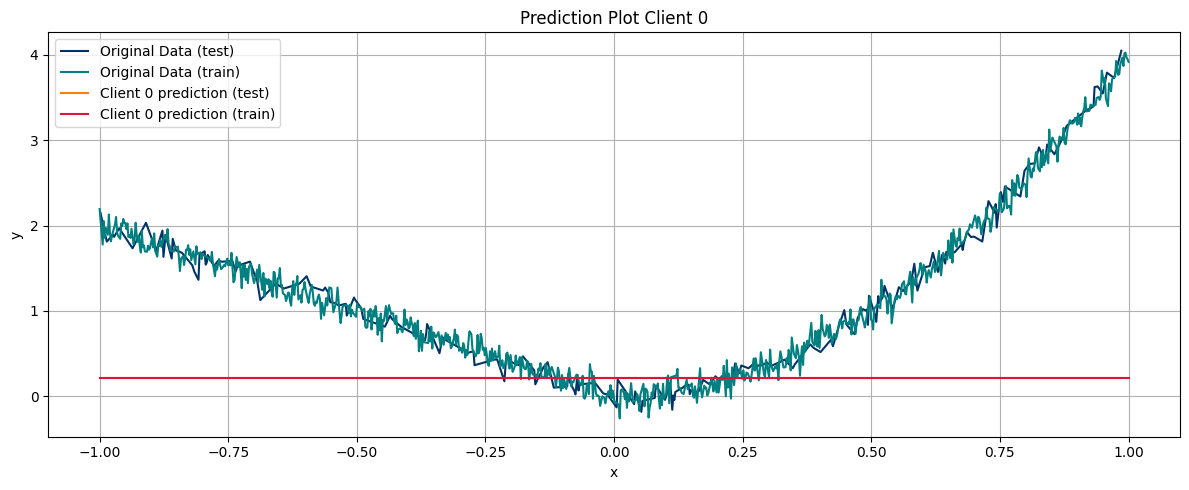

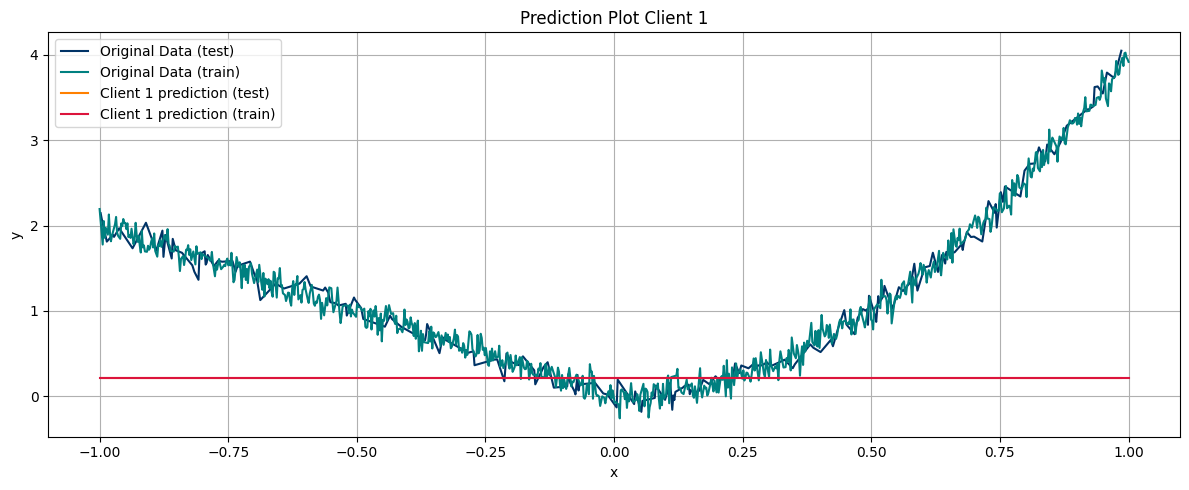

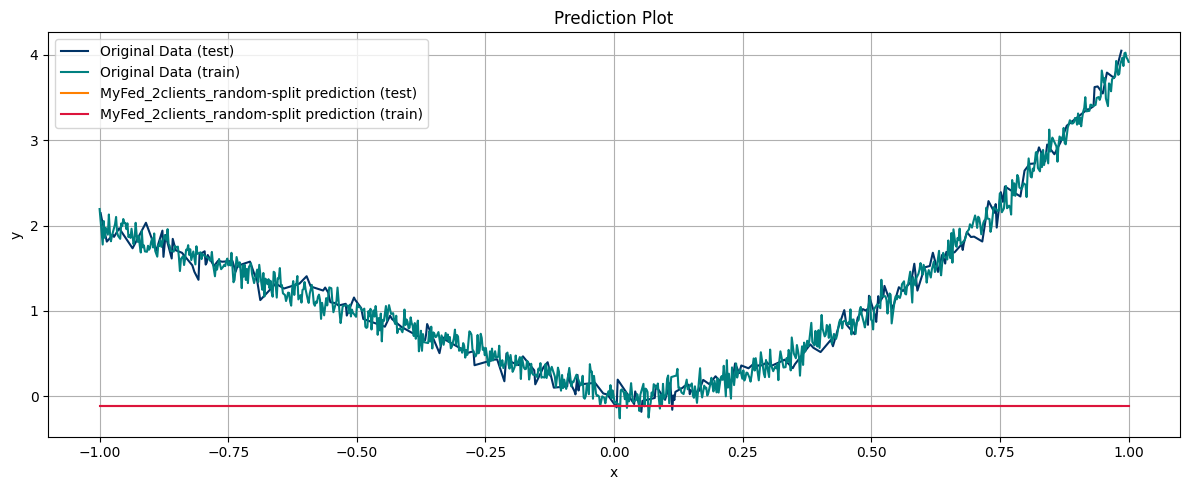

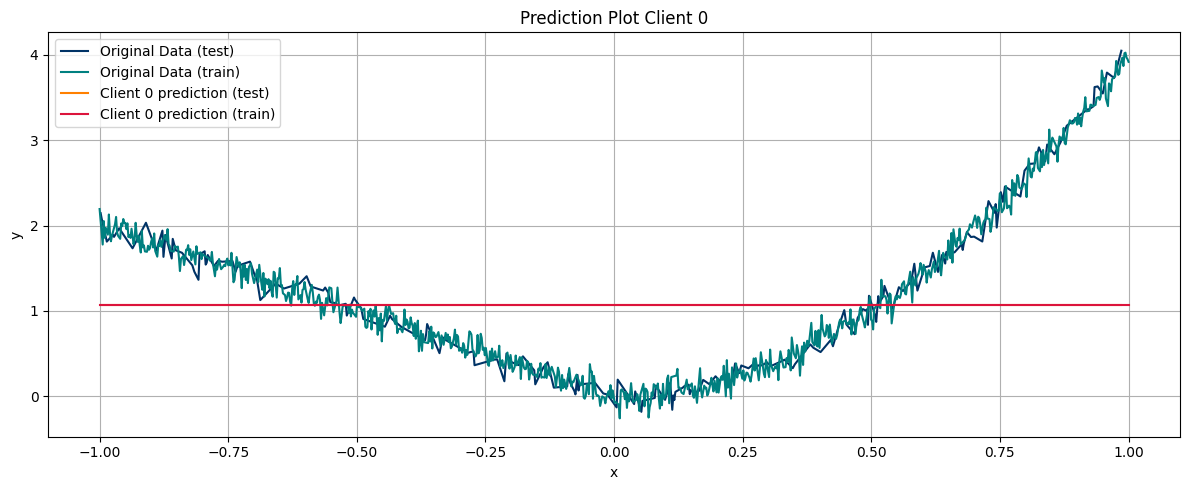

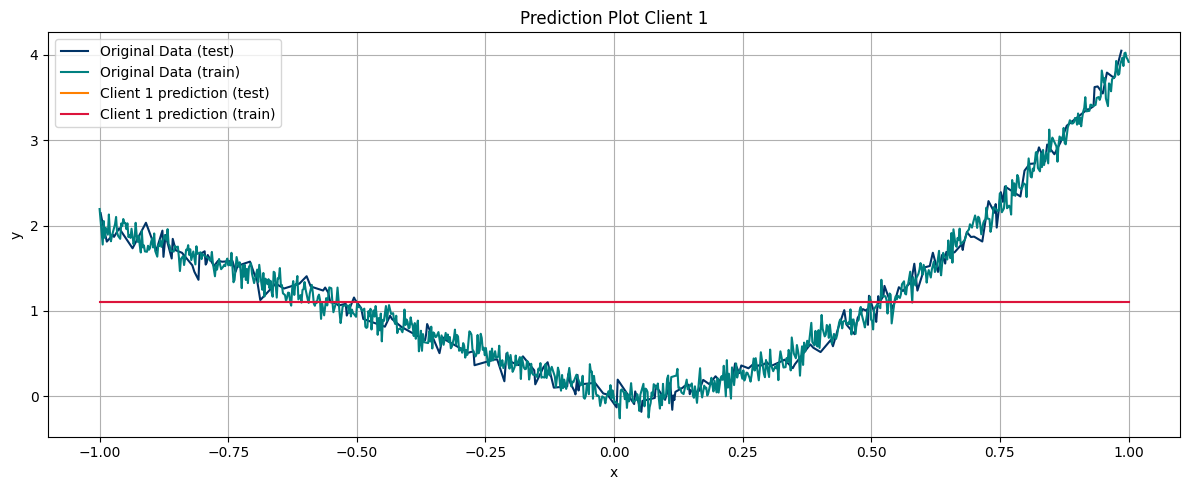

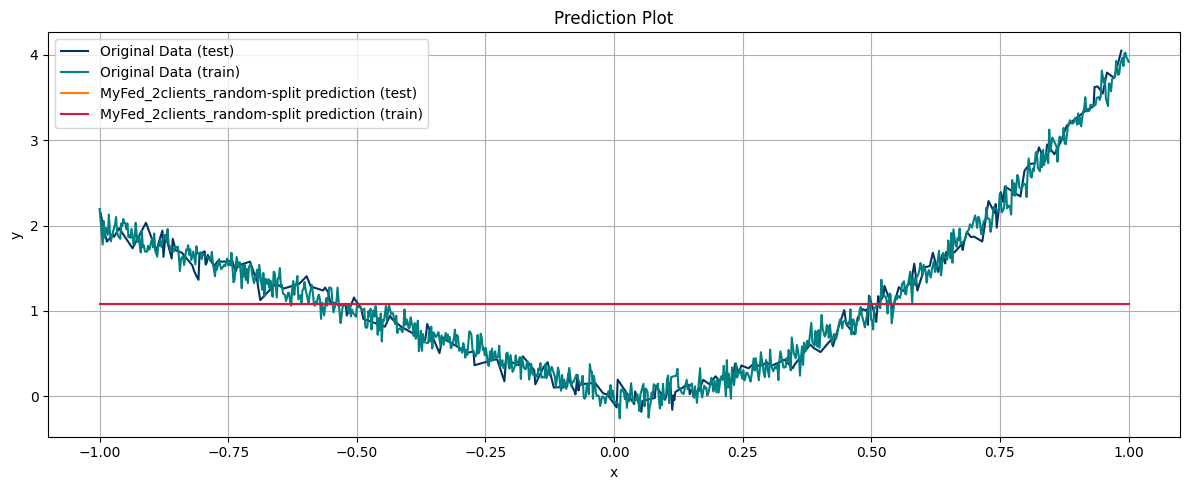

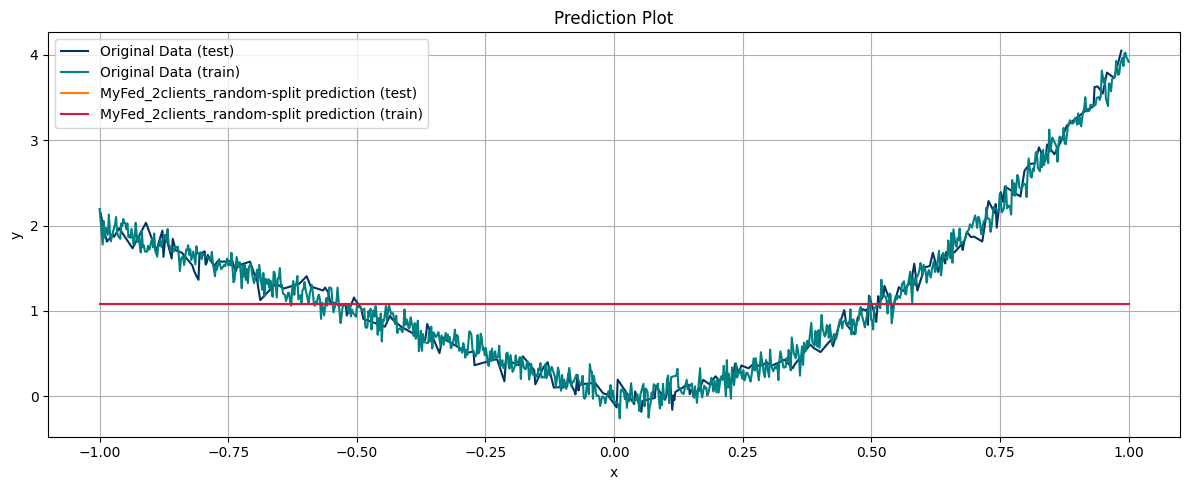

In [9]:
for cr in range(COMMUNICATION_ROUNDS):
    # train each client individually
    for client_no, client in zip(CLIENT_IDs, clients):
        train_client(
            client_no=client_no,
            client_model=client,
            data_loader=client_train_dataloaders[client_no],
            loss_fn=LOSS_FN,
            no_epochs=CLIENT_EPOCHS,
            communication_round=cr,
            writer=writer,
        )

    register_client_test_losses(
        clients=clients, client_ids=CLIENT_IDs, writer=writer, communication_round=cr
    )
    #### ----- Unimportant ----- NOTE: remove####################################################################################
    # print("\n\n CLIENT 1\n", list(clients[0].named_parameters()))
    # print("\n\n CLIENT 2\n", list(clients[1].named_parameters()))
    #### //// ----- Unimportant ------------------------------------------------------------------------------------------------

    if cr != COMMUNICATION_ROUNDS - 1:
        global_model = combine(
            [clients[0], clients[1]],
            similarity_threshold_in_degree=15,
            add_noise=False
        )
    else:
        global_model = average_models(clients)

    writer.add_scalar("test_loss", evaluate(global_model), cr * CLIENT_EPOCHS)

    #### ----- Unimportant ----- NOTE: remove####################################################################################
    from IPython.display import clear_output

    # clear_output(wait=True)
    print(f"Communication Round {cr}/{COMMUNICATION_ROUNDS}")
    print("\r global model: ", global_model.layers, end="")
    # print("\n\n GLOBAL MODEL\n", list(global_model.named_parameters()))

    #### //// ----- Unimportant ------------------------------------------------------------------------------------------------

    clients = [copy.deepcopy(global_model) for _ in CLIENT_IDs]

    if cr == COMMUNICATION_ROUNDS - 2:
        for client in clients:
            client.freeze_all()
            client.unfreeze_layer(-1)
            client.unfreeze_output_scaling()

    ###!!!!!!!!!!!!! NOTE:remove################################################################################################
    plot_predictions(global_model, model_name, writer, epoch=cr)
    # --------------------------------------------------------------------------------------------------------------------------

plot_predictions(global_model, model_name, writer)
register_hyperparameters(writer, last_loss=evaluate(global_model))
writer.close()

In [10]:
print(global_model._hidden_layers)

[15, 24, 22, 24, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
for client in clients:
    print(client)

SelfLearningNet(
  (activation): ReLU()
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=15, bias=False)
    (1): Linear(in_features=16, out_features=24, bias=False)
    (2): Linear(in_features=25, out_features=22, bias=False)
    (3): Linear(in_features=23, out_features=24, bias=False)
    (4): Linear(in_features=25, out_features=2, bias=False)
    (5): Linear(in_features=3, out_features=1, bias=False)
    (6-13): 8 x Linear(in_features=2, out_features=1, bias=False)
  )
)
SelfLearningNet(
  (activation): ReLU()
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=15, bias=False)
    (1): Linear(in_features=16, out_features=24, bias=False)
    (2): Linear(in_features=25, out_features=22, bias=False)
    (3): Linear(in_features=23, out_features=24, bias=False)
    (4): Linear(in_features=25, out_features=2, bias=False)
    (5): Linear(in_features=3, out_features=1, bias=False)
    (6-13): 8 x Linear(in_features=2, out_features=1, bias=False)
  )
)
